In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('/content/DataSet_perishable.csv')

# Ensure correct date format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Create a 'Month' column and aggregate sales by month and sub-category
data['Month'] = data['Order Date'].dt.to_period('M')  # Example: '2015-01'
monthly_data = data.groupby(['Month', 'Sub Category'])['Sales'].sum().reset_index()

# Convert 'Month' to a numeric feature for the model
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp().map(lambda x: x.toordinal())

# Define features (X) and target (y)
X = monthly_data.drop(columns=['Sales'])  # Features: 'Month' and 'Sub Category'
y = np.log1p(monthly_data['Sales'])       # Log-transform the target for stability

# One-hot encode categorical features ('Sub Category')
X = pd.get_dummies(X, columns=['Sub Category'], drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize numerical features
    ('rf', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# Define the hyperparameter grid
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid,
    n_iter=20, scoring='r2', cv=3, verbose=2,
    random_state=42, n_jobs=-1
)

# Train the model
search.fit(X_train, y_train)

# Make predictions
y_pred = search.best_estimator_.predict(X_test)

# Back-transform predictions and target from log scale
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 10}
Mean Absolute Error (MAE): 413.3060339288667
Mean Squared Error (MSE): 325553.45901258336
R² Score: 0.7553927977864934


In [ ]:
# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print results
print(f"Best Parameters: {search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 10}
Mean Absolute Error (MAE): 413.3060339288667
Mean Squared Error (MSE): 325553.45901258336
R² Score: 0.7553927977864934
Mean Absolute Percentage Error (MAPE): 19.566592596901064%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('/content/DataSet_perishable.csv')

# Ensure correct date format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Create a 'Month' column
data['Month'] = data['Order Date'].dt.to_period('M')  # Example: '2015-01'

# Group by 'Month' and 'Sub Category', summing up the 'Sales' column
monthly_data = data.groupby(['Month', 'Sub Category'])['Sales'].sum().reset_index()

# Check if aggregation is correct (sanity check)
print("Aggregated Data Sample:")
print(monthly_data.head())  # View the aggregated data

# Convert 'Month' to numeric ordinal format for modeling
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp().map(lambda x: x.toordinal())

# Define features (X) and target (y)
X = monthly_data.drop(columns=['Sales'])  # Features: 'Month' and 'Sub Category'
y = np.log1p(monthly_data['Sales'])       # Log-transform the target for stability

# One-hot encode categorical features ('Sub Category')
X = pd.get_dummies(X, columns=['Sub Category'], drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize numerical features
    ('rf', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# Define the hyperparameter grid
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid,
    n_iter=20, scoring='r2', cv=3, verbose=2,
    random_state=42, n_jobs=-1
)

# Train the model
search.fit(X_train, y_train)

# Make predictions
y_pred = search.best_estimator_.predict(X_test)

# Back-transform predictions and target from log scale
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print results
print(f"Best Parameters: {search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Aggregated Data Sample:
     Month   Sub Category  Sales
0  2015-01  Breads & Buns    914
1  2015-01          Cakes    173
2  2015-01        Chicken   1920
3  2015-01           Eggs   1549
4  2015-01           Fish   1010
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 10}
Mean Absolute Error (MAE): 413.3060339288667
Mean Squared Error (MSE): 325553.45901258336
R² Score: 0.7553927977864934
Mean Absolute Percentage Error (MAPE): 19.566592596901064%


In [ ]:

daily_demand = data.resample('D')['Sales'].sum()

weekly_demand = data.resample('W')['Sales'].sum()

monthly_demand = data.resample('ME')['Sales'].sum()

annual_demand = data.resample('YE')['Sales'].sum()


In [ ]:
data.head(15)

,Order Date,Customer Name,Sub Category,Sales,Expiry Date,City,Region,Month
0,2015-01-01,Meera Krishnamurthy,Breads & Buns,151,2015-01-03,Lucknow,Central,2015-01
1,2015-01-01,Priya Patel,Organic Vegetables,69,2015-01-06,Jhansi,West,2015-01
2,2015-01-01,Lakshmi Nair,Fish,38,2015-01-02,Chitrakut,South,2015-01
3,2015-01-01,Amit Kumar,Mutton,38,2015-01-02,Mirzapur,South,2015-01
4,2015-01-01,Nitin Hegde,Chicken,189,2015-01-02,Prayagraj,South,2015-01
5,2015-01-01,Nitin Hegde,Eggs,154,2015-01-15,Prayagraj,South,2015-01
6,2015-01-01,Neha Singh,Organic Fruits,22,2015-01-07,Mathura,West,2015-01
7,2015-01-01,Priya Patel,Cakes,11,2015-01-03,Jhansi,West,2015-01
8,2015-01-01,Kiran Malhotra,Fresh Vegetables,89,2015-01-03,Varanasi,South,2015-01
9,2015-01-01,Rajesh Mehta,Organic Staples,44,2015-01-10,Rae Bareilly,Central,2015-01


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

data = pd.read_csv('/content/DataSet_perishable.csv')
# Step 1: Aggregate data to monthly
data['Order Date'] = pd.to_datetime(data['Order Date'])  # Ensure datetime format
data.set_index('Order Date', inplace=True)
monthly_data = data.resample('ME')['Sales'].sum().reset_index()
monthly_data.rename(columns={'Sales': 'Monthly_Sales'}, inplace=True)

# Step 2: Feature engineering
monthly_data['Month'] = monthly_data['Order Date'].dt.month
monthly_data['Year'] = monthly_data['Order Date'].dt.year
monthly_data['Lag_1'] = monthly_data['Monthly_Sales'].shift(1)  # Previous month's sales
monthly_data['Lag_2'] = monthly_data['Monthly_Sales'].shift(2)  # Two months ago

# Drop NaN rows caused by lag features
monthly_data.dropna(inplace=True)

# Step 3: Split the data
X = monthly_data[['Month', 'Year', 'Lag_1', 'Lag_2']]
y = monthly_data['Monthly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model using Random Forest with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Step 5: Make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)*100
print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")



Model Performance:
Mean Absolute Error (MAE): 2159.284285714286
Mean Squared Error (MSE): 6434185.2616428565
R² Score: 0.6843809169473558
Mean Absolute Percentage Error (MAPE): 13.85951495241894


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


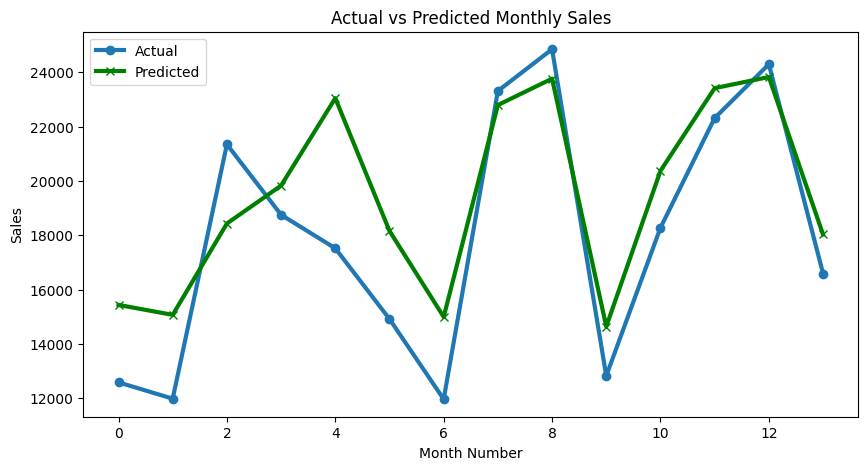

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o', lw=3)
plt.plot(y_pred, label='Predicted', marker='x', lw=3, color = 'green')
plt.xlabel('Month Number')
plt.ylabel('Sales')
plt.legend()
plt.title('Actual vs Predicted Monthly Sales')
plt.show()


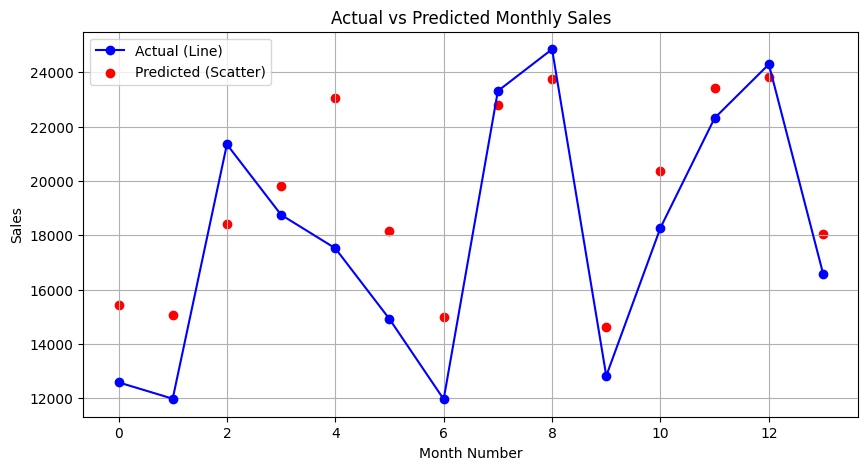

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual (Line)', marker='o', linestyle='-', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted (Scatter)', color='red')
plt.title('Actual vs Predicted Monthly Sales')
plt.ylabel('Sales')
plt.xlabel('Month Number')
plt.legend()
plt.grid(True)
plt.show()


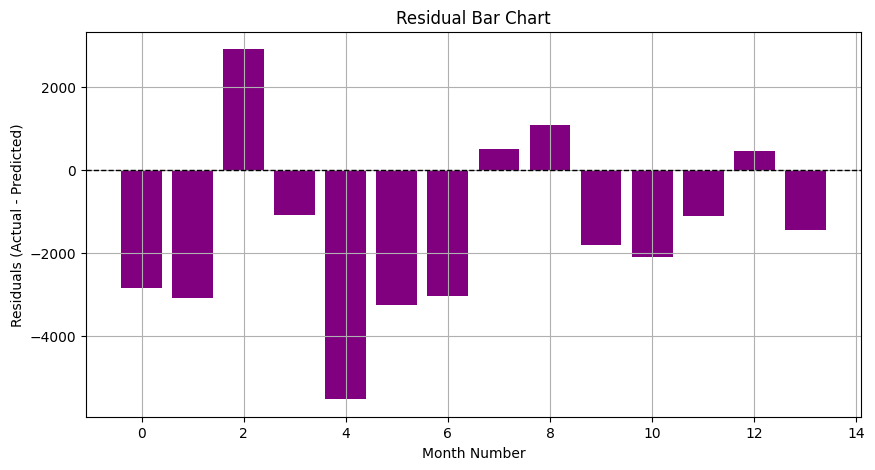

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residual bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(residuals)), residuals, color='purple')
plt.title('Residual Bar Chart')
plt.xlabel('Month Number')
plt.ylabel('Residuals (Actual - Predicted)')
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Zero error line
plt.grid(True)
plt.show()


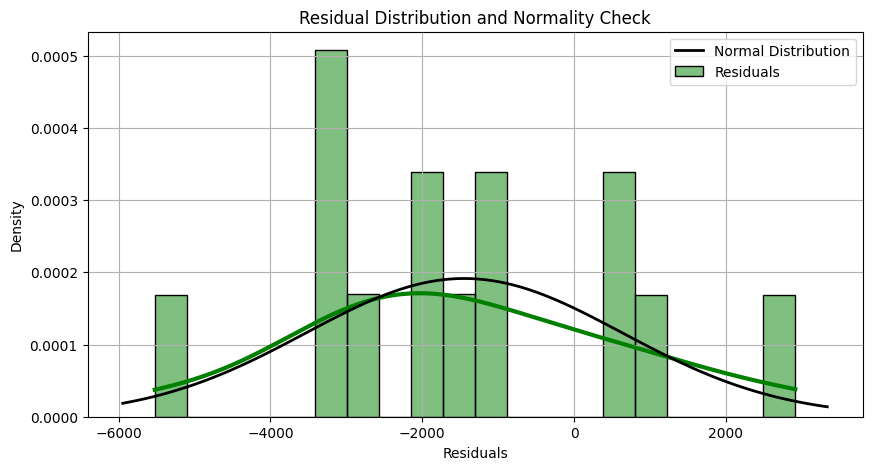

In [ ]:
import seaborn as sns
from scipy.stats import norm

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='green', stat='density', bins=20, label='Residuals')

# Overlay normal distribution curve
mu, std = norm.fit(residuals)  # Fit a normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Residual Distribution and Normality Check')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Step 1: Prepare future dates
last_date = monthly_data['Order Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                             periods=24,
                             freq='ME')  # Next 2 years of monthly data

future_df = pd.DataFrame({'Order Date': future_dates})
future_df['Month'] = future_df['Order Date'].dt.month
future_df['Year'] = future_df['Order Date'].dt.year

# Step 2: Adding lag features based on the last known data
future_df['Lag_1'] = monthly_data['Monthly_Sales'].iloc[-1]  # Last month's sales
future_df['Lag_2'] = monthly_data['Monthly_Sales'].iloc[-2]  # Two months ago


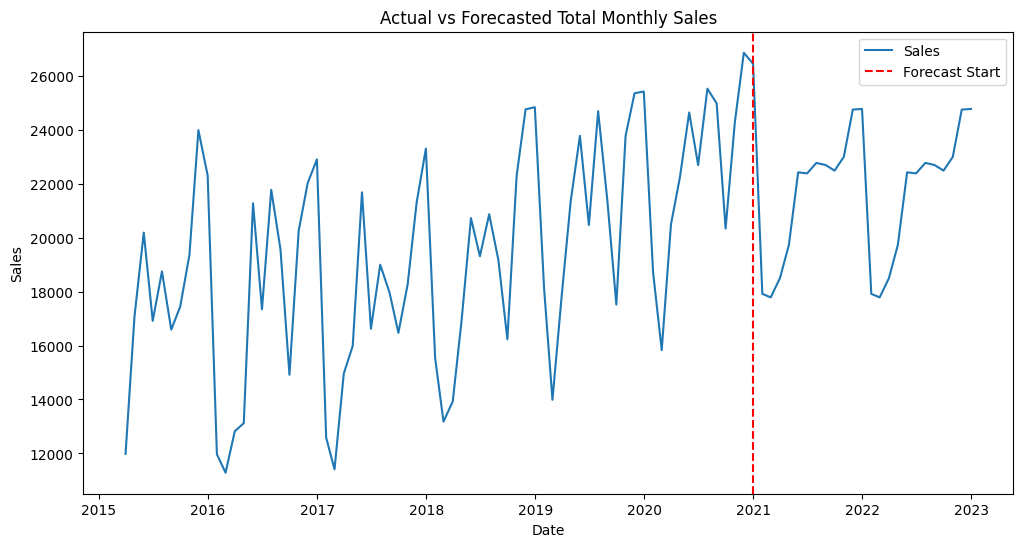

<ipython-input-56-192a5cab79db>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_total = data.resample('M')['Sales'].sum()  # Resample by month and sum sales


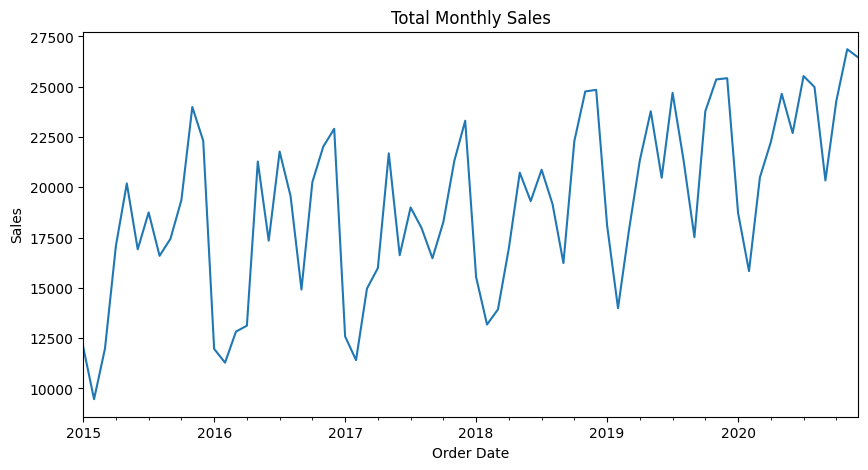

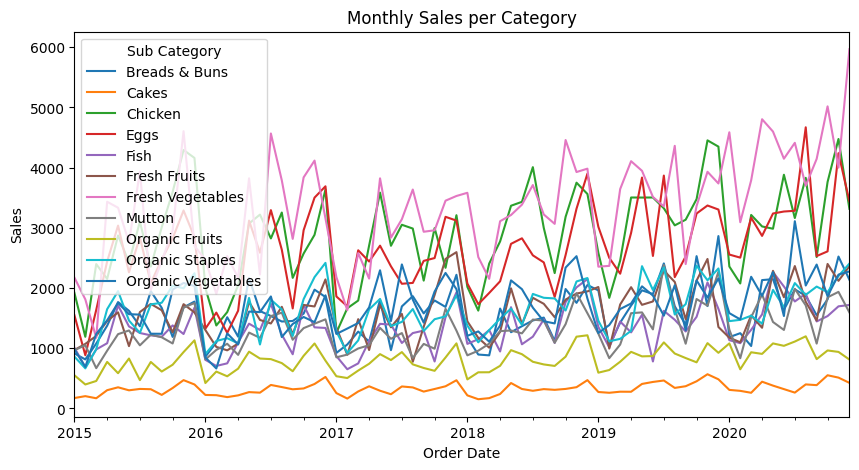

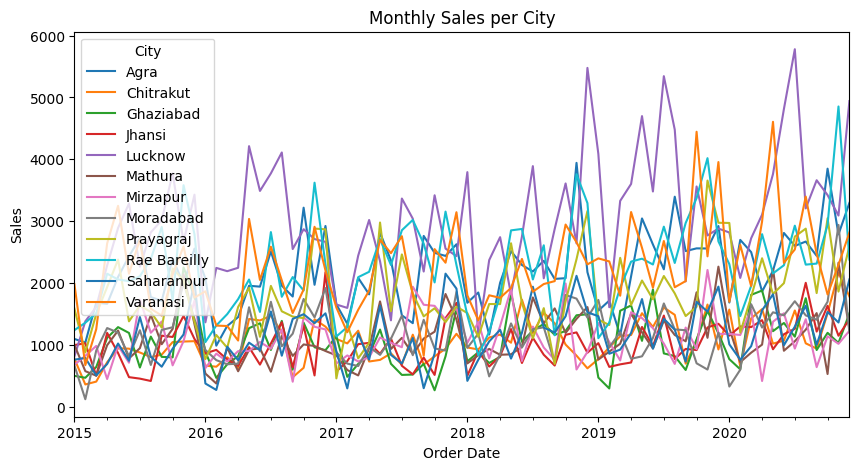

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data.index = pd.to_datetime(data.index, errors='coerce')

# Plot Total Monthly Sales
monthly_sales_total = data.resample('M')['Sales'].sum()
monthly_sales_total.plot(title='Total Monthly Sales', figsize=(10, 5))
plt.ylabel('Sales')
plt.show()

# Plot Monthly Sales per Category
monthly_sales_category = data.groupby([data.index.to_period('M'), 'Sub Category'])['Sales'].sum().unstack()
monthly_sales_category.plot(title='Monthly Sales per Category', figsize=(10, 5))
plt.ylabel('Sales')
plt.show()

# Plot Monthly Sales per City
monthly_sales_city = data.groupby([data.index.to_period('M'), 'City'])['Sales'].sum().unstack()
monthly_sales_city.plot(title='Monthly Sales per City', figsize=(10, 5))
plt.ylabel('Sales')
plt.show()
